In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate as tab
import statistics as st
import warnings
warnings.filterwarnings('ignore')
import ast
from ast import literal_eval

# TMDB Movie Data Analysis

In [2]:
df=pd.read_csv('DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

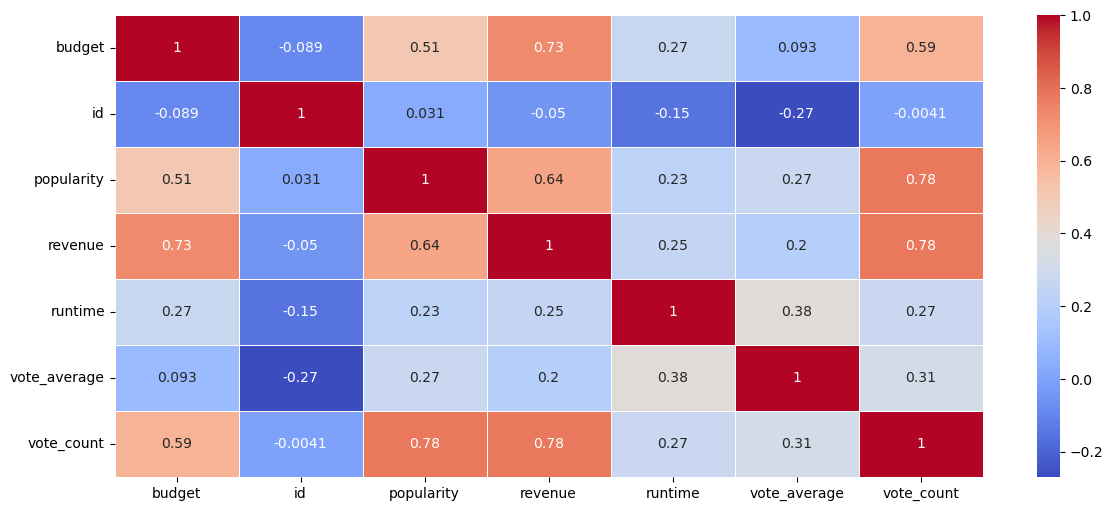

In [3]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),cbar=True,linewidths=0.5,cmap='coolwarm',annot=True)
plt.show()

In [4]:
def data_type(df):
    global obj, num
    obj=list(df.select_dtypes(np.object))
    num=list(df.select_dtypes(np.number))
    print(tab({'Categorical':obj,'Numerical':num},headers='keys',tablefmt='psql'))
data_type(df)

+----------------------+--------------+
| Categorical          | Numerical    |
|----------------------+--------------|
| genres               | budget       |
| homepage             | id           |
| keywords             | popularity   |
| original_language    | revenue      |
| original_title       | runtime      |
| overview             | vote_average |
| production_companies | vote_count   |
| production_countries |              |
| release_date         |              |
| spoken_languages     |              |
| status               |              |
| tagline              |              |
| title                |              |
+----------------------+--------------+


## Task-1

In [5]:
#Number of rows and columns in the dataset
print(f'rows: {df.shape[0]}\ncolumns: {df.shape[1]}')

rows: 4803
columns: 20


In [6]:
df['genres'] = df['genres'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

dfhead = df.head(50)
top50title_genre = dfhead[['title','genres']]
top50title_genre

,title,genres
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Fantasy, Action, Adventure]"
6,Tangled,"[Animation, Family]"
7,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Action, Adventure, Fantasy]"


## Task-2

In [7]:
t2={'Columns name':df.columns,
    'Data type':df.dtypes,
    'Count of missing values':df.isnull().sum()}
print(tab(t2,headers='keys',tablefmt='psql'))

+----------------------+-------------+---------------------------+
| Columns name         | Data type   |   Count of missing values |
|----------------------+-------------+---------------------------|
| budget               | int64       |                         0 |
| genres               | object      |                         0 |
| homepage             | object      |                      3091 |
| id                   | int64       |                         0 |
| keywords             | object      |                         0 |
| original_language    | object      |                         0 |
| original_title       | object      |                         0 |
| overview             | object      |                         3 |
| popularity           | float64     |                         0 |
| production_companies | object      |                         0 |
| production_countries | object      |                         0 |
| release_date         | object      |                        

In [8]:
#Filling the null values with there forward values
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

## task-3

In [9]:
task3 = df[df['budget'] > 220000]
grp_t3 = task3.explode('genres').groupby('genres')['budget'].sum().reset_index()
t3 = grp_t3.sort_values('budget', ascending=False).reset_index(drop=True)
t3

,genres,budget
0,Action,59443005241
1,Adventure,52398010432
2,Drama,47495842608
3,Comedy,43588404898
4,Thriller,40726728371
5,Science Fiction,27747605857
6,Fantasy,26949635826
7,Family,26018929595
8,Crime,19383213929
9,Romance,18157446466


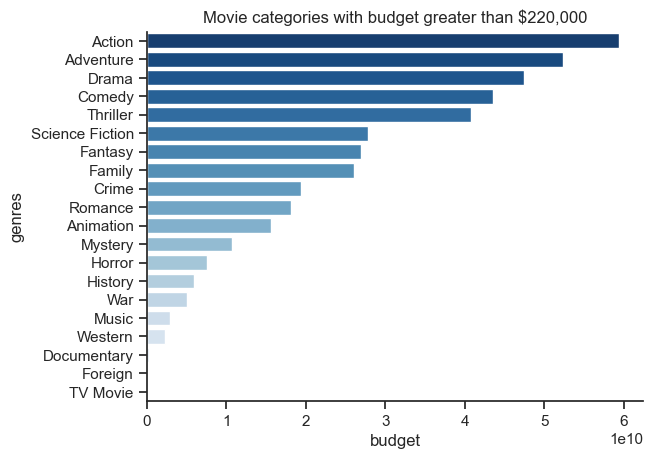

In [10]:
sns.set(style='ticks')
plt.title('Movie categories with budget greater than $220,000')
sns.barplot(y='genres',x='budget',data=t3,palette = sns.color_palette("Blues_r", len(t3)))
sns.despine()
plt.show()

## Task-4

In [11]:
task4 = df[df['revenue'] > 961000000]
grp_t4 = task4.explode('genres').groupby('genres')['revenue'].sum().reset_index()
t4 = grp_t4.sort_values('revenue', ascending=False).reset_index(drop=True)
t4

,genres,revenue
0,Adventure,22569746488
1,Action,20766026160
2,Science Fiction,11810352083
3,Fantasy,10007848508
4,Family,7437198819
5,Thriller,6556621554
6,Drama,4901082331
7,Animation,4468681559
8,Comedy,3194462550
9,Crime,2089497543


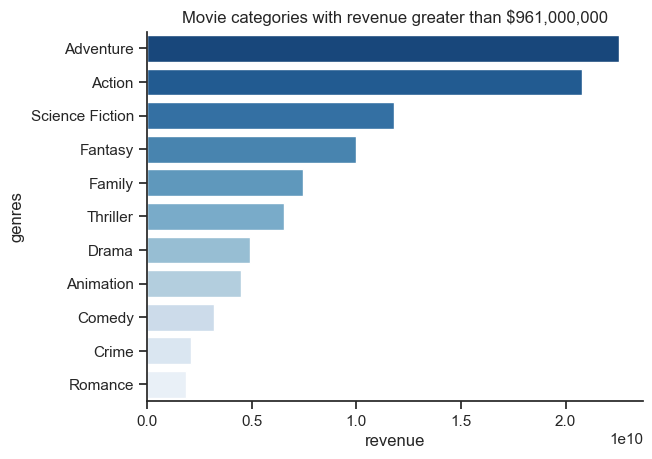

In [12]:
plt.title('Movie categories with revenue greater than $961,000,000')
sns.barplot(y='genres',x='revenue',data=t4,palette = sns.color_palette("Blues_r", len(t4)))
sns.despine()
plt.show()

## Task-5

In [13]:
task5=df[(df.budget == 0) | (df.revenue == 0)].index
df=df.drop(labels=task5, axis=0)
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,[Comedy],http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-09-1994,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4788,12000,"[Horror, Comedy, Crime]",http://www.thepuffychairmovie.com,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12-03-1972,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110
4792,20000,"[Crime, Horror, Mystery, Thriller]",http://tincanmanthemovie.com/,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_

In [14]:
df.shape

(3229, 20)

## Task-6

In [15]:
t6_rev = df[['title','revenue']].sort_values('revenue',ascending=False).head(10)
t6_bug = df[['title','budget']].sort_values('budget',ascending=True).head(10)

pd.set_option('display.width',0)
pd.set_option('display.max_columns',0)
display(t6_rev, t6_bug)

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


,title,budget
4238,Modern Times,1
3611,A Farewell to Arms,4
3372,Split Second,7
3419,Bran Nue Dae,7
4608,The Prophecy,8
3131,Of Horses and Men,10
3137,Nurse 3-D,10
2933,F.I.S.T.,11
1912,Angela's Ashes,25
1771,The 51st State,28


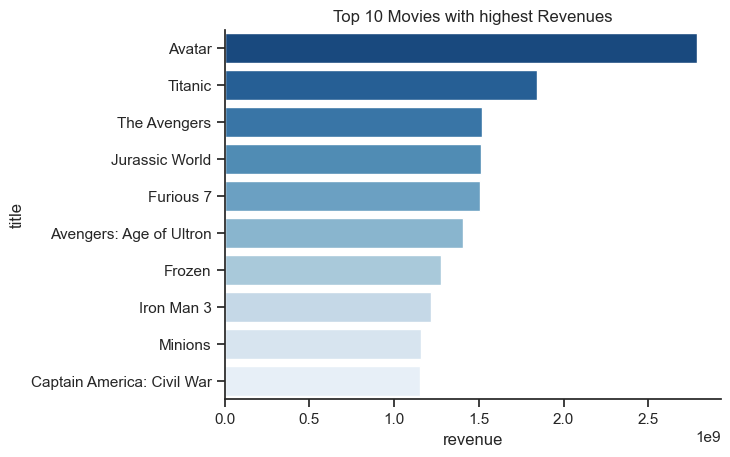

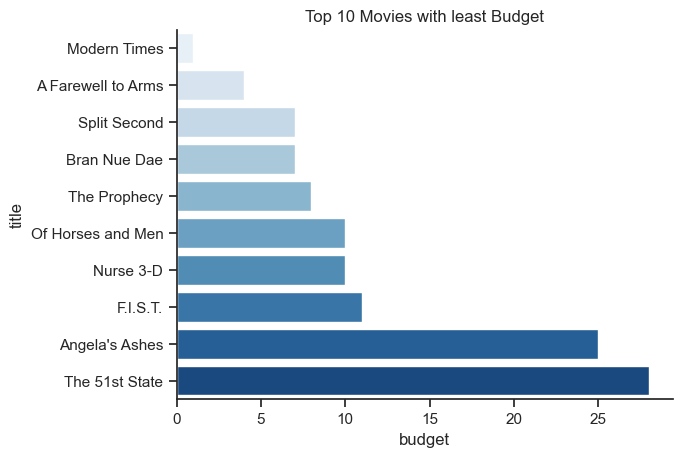

In [16]:
#sns.set(style='whitegrid')

plt.title('Top 10 Movies with highest Revenues')
sns.barplot(y='title',x='revenue',data=t6_rev,palette = sns.color_palette("Blues_r", len(t6_rev)))
sns.despine()
plt.show()

plt.title('Top 10 Movies with least Budget')
sns.barplot(y='title',x='budget',data=t6_bug,palette = sns.color_palette("Blues", len(t6_bug)))
sns.despine()
plt.show()

## Task-7

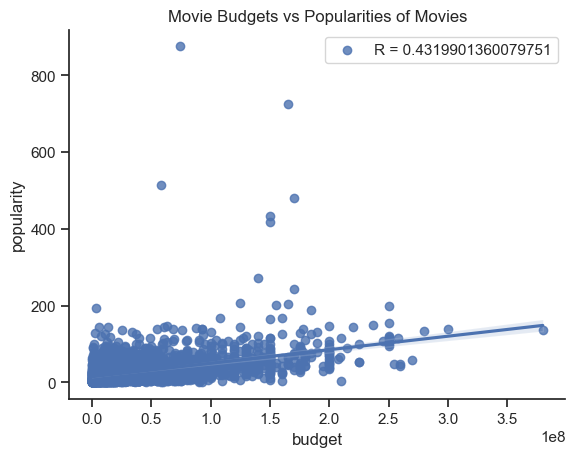

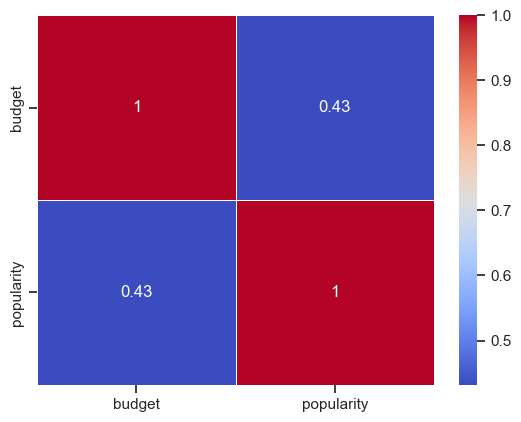

In [17]:
cor = df['budget'].corr(df['popularity'])
sns.regplot(data=df,x='budget',y='popularity',label='R = '+str(cor))
plt.title('Movie Budgets vs Popularities of Movies')
plt.legend()
sns.despine()
plt.show()

cor1 = df[['budget','popularity']]
sns.heatmap(cor1.corr(),cbar=True,linewidths=0.5,cmap='coolwarm',annot=True)
plt.show()

## Task-8

In [18]:
# importing Counter class from the collections module to count the occurrences of each production_company.
from collections import Counter

df['production_companies'] = df['production_companies'].apply(ast.literal_eval)
comp = df['production_companies'].apply(lambda x: [production_companies['name'] for production_companies in x])
df['production_companies'] = comp

comp_counts = Counter([comp for sublist in df['production_companies'] for comp in sublist])

task8 = pd.DataFrame(list(comp_counts.items()),columns=['production_companies', 'count'])
t8 = task8.sort_values('count',ascending=False)
t8

,production_companies,count
11,Warner Bros.,280
52,Universal Pictures,273
38,Paramount Pictures,245
1,Twentieth Century Fox Film Corporation,201
7,Columbia Pictures,167
...,...,...
1685,HW Two,1
1687,Unfinished Films,1
1688,Infinity Features Entertainment,1
1690,British Columbia Film,1


## Task-9

In [19]:
#task9

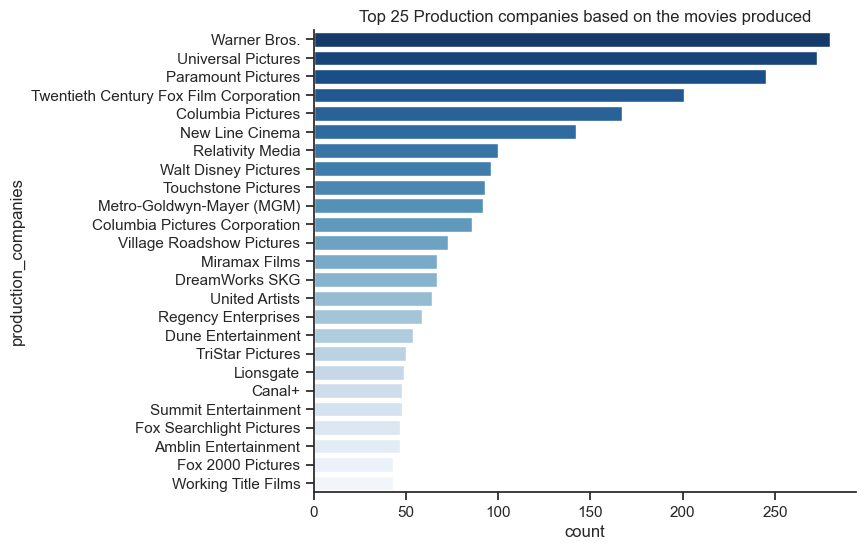

In [20]:
sns.set(style='ticks')
task9 = t8.head(25)
plt.figure(figsize=(7,6))
plt.title('Top 25 Production companies based on the movies produced')
sns.barplot(y='production_companies',x='count',data=task9,palette = sns.color_palette("Blues_r", len(task9)))
sns.despine()
plt.show()

## Task-10

In [21]:
task10 = df.sort_values('revenue',ascending=False).head(500)
t10 = task10[['budget','revenue','runtime']]

#creating empty lists to store calculated central tendency
mean=[]
median=[]
mode=[]

for col in t10:
    mean.append(t10[col].mean())
    median.append(t10[col].median())
    mode.append(st.mode(t10[col]))
    
round_mean = [round(n, 1) for n in mean]
round_median = [int(n) for n in median]
row_head=['Mean','Median','Mode']

#creating DataFrame
t10_df=pd.DataFrame([round_mean,round_median,mode],columns=t10.columns,index=row_head)
t10_df

,budget,revenue,runtime
Mean,103193736.0,4.585776e+08,118.7
Median,95000000.0,3.630016e+08,116.0
Mode,150000000.0,2.787965e+09,115.0


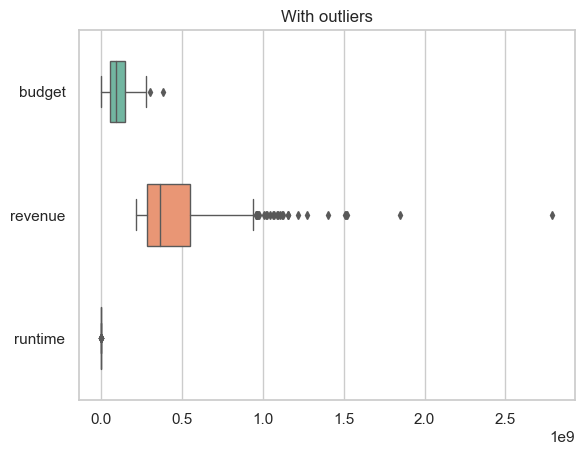

In [22]:
sns.set(style='whitegrid')
sns.boxplot(data=t10,orient='h',width=0.5,fliersize=4,linewidth=1,palette='Set2')
plt.title('With outliers')
plt.show()

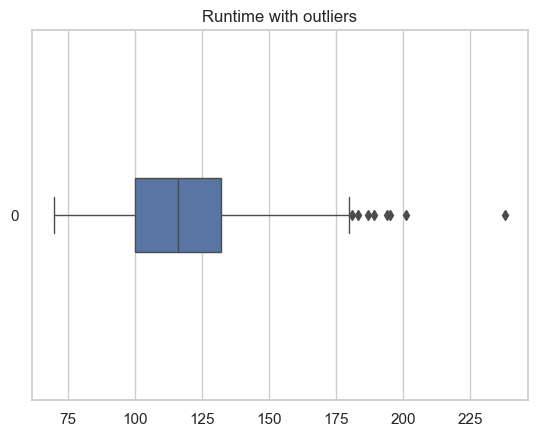

In [23]:
sns.boxplot(data=t10['runtime'],orient='h',width=0.2,fliersize=5,linewidth=1)
plt.title('Runtime with outliers')
plt.show()

In [24]:
t10

,budget,revenue,runtime
0,237000000,2787965087,162.0
25,200000000,1845034188,194.0
16,220000000,1519557910,143.0
28,150000000,1513528810,124.0
44,190000000,1506249360,137.0
...,...,...,...
397,85000000,219103655,121.0
1744,30000000,219076518,129.0
698,70000000,218613188,99.0
717,60000000,218340595,130.0


In [25]:
def outliers(col_name):
    Q1 = t10[col_name].quantile(0.25)
    Q3 = t10[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lf = Q1 - 1.5 * IQR
    uf = Q3 + 1.5 * IQR
    t10_outliers = t10.index[(t10[col_name] < lf) | (t10[col_name] > uf)]
    return t10_outliers

In [26]:
index_list = []
for col in ['budget','revenue','runtime']:
    index_list.extend(outliers(col))

In [27]:
def remove_outliers(il):
    il = sorted(set(il))
    t10_ = t10.drop(il)
    return t10_

In [28]:
t10_no_outliers = remove_outliers(index_list)
t10_no_outliers

,budget,revenue,runtime
328,94000000,940335536,100.0
113,150000000,938212738,138.0
8,250000000,933959197,153.0
330,79000000,926287400,179.0
233,115000000,924317558,136.0
...,...,...,...
397,85000000,219103655,121.0
1744,30000000,219076518,129.0
698,70000000,218613188,99.0
717,60000000,218340595,130.0


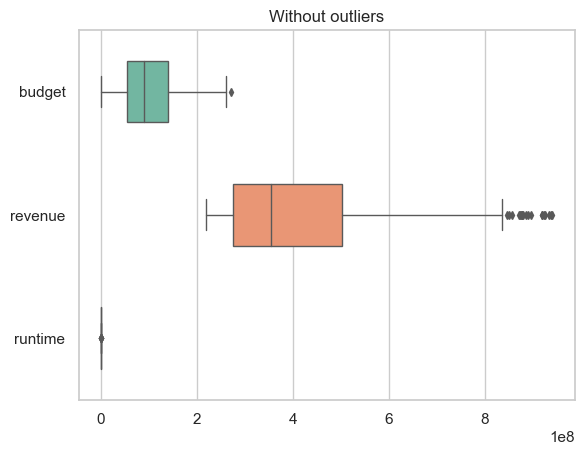

In [29]:
sns.boxplot(data=t10_no_outliers,orient='h',width=0.5,fliersize=4,linewidth=1,palette='Set2')
plt.title('Without outliers')
plt.show()

## Task-11

In [30]:
task11 = task10[["title","runtime"]]
t11_mean = task11.runtime.mean()
t11 = task11[task11.runtime > t11_mean].sort_values('runtime',ascending=False)
t11

,title,runtime
3813,Gone with the Wind,238.0
329,The Lord of the Rings: The Return of the King,201.0
1818,Schindler's List,195.0
25,Titanic,194.0
690,The Green Mile,189.0
...,...,...
2668,Pretty Woman,119.0
245,Tomorrow Never Dies,119.0
2667,Fatal Attraction,119.0
249,Insurgent,119.0


## Extra analysis

In [31]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [32]:
extra1 = df[['title','budget','vote_average']]
extra1.sort_values('vote_average',ascending=False)

,title,budget,vote_average
1881,The Shawshank Redemption,25000000,8.5
2970,There Goes My Baby,10500000,8.5
3337,The Godfather,6000000,8.4
3865,Whiplash,3300000,8.3
2731,The Godfather: Part II,13000000,8.3
...,...,...,...
4619,"First Love, Last Rites",300000,3.0
2899,Legend of a Rabbit,19000000,3.0
1101,Foodfight!,65000000,2.3
4486,Naturally Native,700000,0.0


In [33]:
df['production_countries'] = df['production_countries'].apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [production_countries['name'] for production_countries in x])

df_pro_countries = df[['title','production_countries']]
df_pro_countries

,title,production_countries
0,Avatar,"[United States of America, United Kingdom]"
1,Pirates of the Caribbean: At World's End,[United States of America]
2,Spectre,"[United Kingdom, United States of America]"
3,The Dark Knight Rises,[United States of America]
4,John Carter,[United States of America]
...,...,...
4773,Clerks,[United States of America]
4788,Pink Flamingos,[United States of America]
4792,Cure,[Japan]
4796,Primer,[United States of America]


In [35]:
df['keywords'] = df['keywords'].apply(ast.literal_eval)
df['keywords'] = df['keywords'].apply(lambda x: [keywords['name'] for keywords in x])

df['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4773             [salesclerk, loser, aftercreditsstinger]
4788    [gay, trailer park, pop culture, drug dealer, ...
4792    [japan, prostitute, hotel, based on novel, hal...
4796    [distrust, garage, identity crisis, time trave...
4798    [united states–mexico barrier, legs, arms, pap...
Name: keywords, Length: 3229, dtype: object